In [15]:
# Import packages
import numpy as np
import pandas as pd
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.tree import plot_tree
from sklearn import tree
from dtreeviz.trees import dtreeviz



In [16]:

df = pd.read_csv('../final_data_cleaned.csv')
#df['y'].mask(df['y'] == 0, 'real', inplace=True)
#f['y'].mask(df['y'] == 1, 'scammer', inplace=True)



df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8454 entries, 0 to 8453
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   username                        8454 non-null   object 
 1   age                             8452 non-null   float64
 2   occupation                      8450 non-null   object 
 3   status                          8454 non-null   object 
 4   gender                          8454 non-null   object 
 5   filtered sentence               8454 non-null   object 
 6   Language                        8454 non-null   object 
 7   y                               8454 non-null   int64  
 8   translated_occupation           8454 non-null   object 
 9   status_lem                      8454 non-null   object 
 10  translated_occupation_lem       8454 non-null   object 
 11  translated_occupation_category  8454 non-null   object 
dtypes: float64(1), int64(1), object(10

In [17]:
df.isna().sum()
df.dropna(inplace=True)
df['translated_occupation_category'].value_counts()
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)
df[['translated_occupation_category_encoded']]=df[['translated_occupation_category']].apply(labelencoder.fit_transform)



df['age_grp'] = pd.qcut(df['age'], 4)
df['age_group_encoded'] = labelencoder.fit_transform(df['age_grp'])

df.head()

# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
X.sample(10)

# target
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


rf = RandomForestClassifier(
                            criterion='entropy',
                            n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                    
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=424)

rf.fit(X_train, y_train)

C:\Users\tiffa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       n_jobs=-1, random_state=424)

Precision: 0.8975609756097561
Recall: 0.336996336996337
F1_score: 0.4900133155792277
Accuracy: 0.7733727810650888


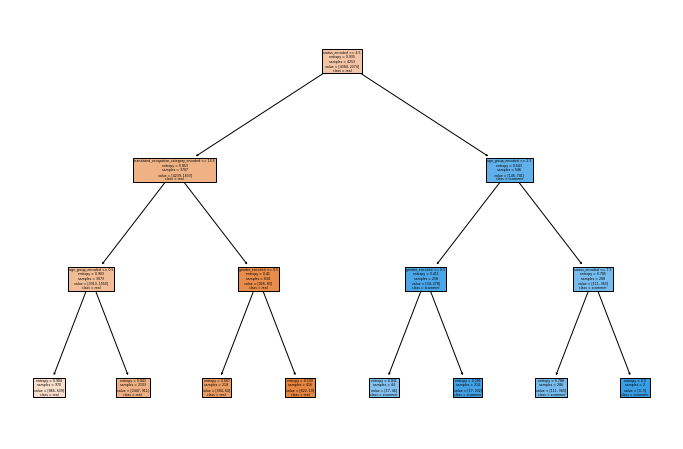

In [18]:


tree.plot_tree(rf.estimators_[3], feature_names=X_test.columns,class_names=['real', "scammer"],filled=True)

y_pred = rf.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1_score:",f1_score)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))




In [19]:
# get predictions and compare results
predictions1 = rf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions1})
results_df.sample(10)

# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions1)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("before sampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

before sampling
Accuracy: 0.7733727810650888
Precision: 0.8975609756097561
recall: 0.336996336996337
f1_score: 0.4900133155792277


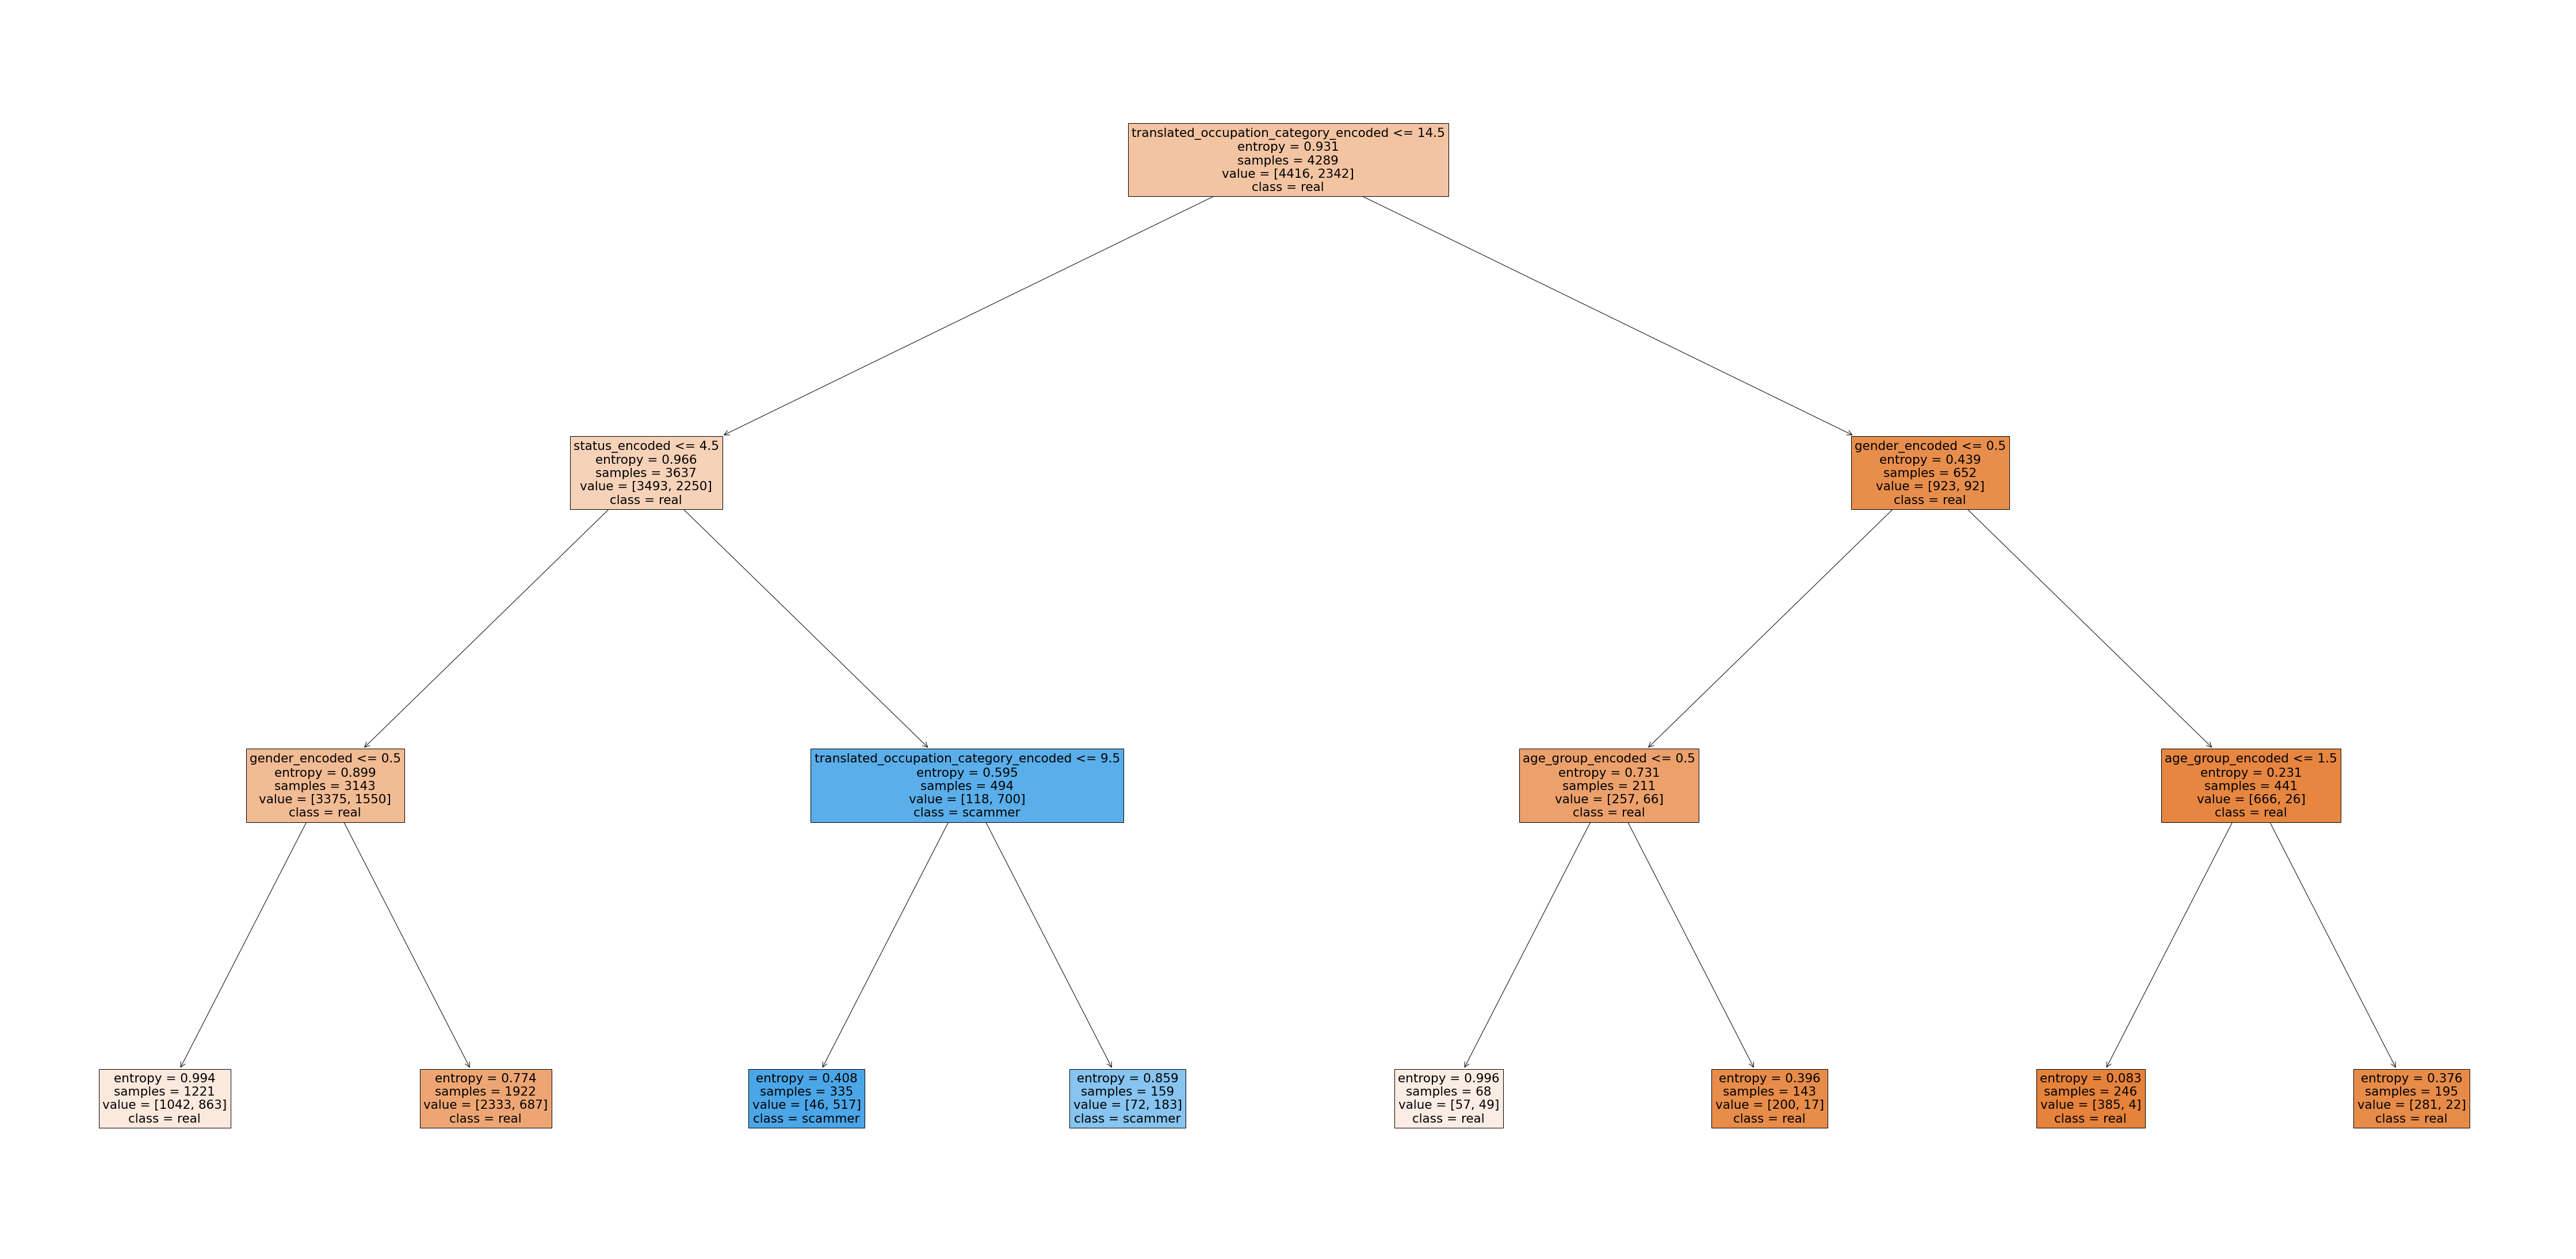

In [20]:
feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded','translated_occupation_category_encoded']

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf.estimators_[4],  feature_names =feature_cols,class_names=['real', "scammer"],filled=True);

In [21]:
X, y = make_blobs(n_samples=10000, n_features=6, centers=100,random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())


clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())



0.969
0.9914
0.9948


In [22]:
#BAGGING
#METHOD 1
...
# generate dataset
X, y = make_classification(n_samples=10000, n_features=6, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
model = BaggingClassifier()


...
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.894


In [23]:
#METHOD 2



# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))



# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy of bc: 1.00
Test set accuracy of dt: 0.99
Precision: 1.0
Recall: 0.7
F-measure: 0.8235294117647058
Test set accuracy: 0.997, OOB accuracy: 0.996


<h3> Random Under Sampling<h3>

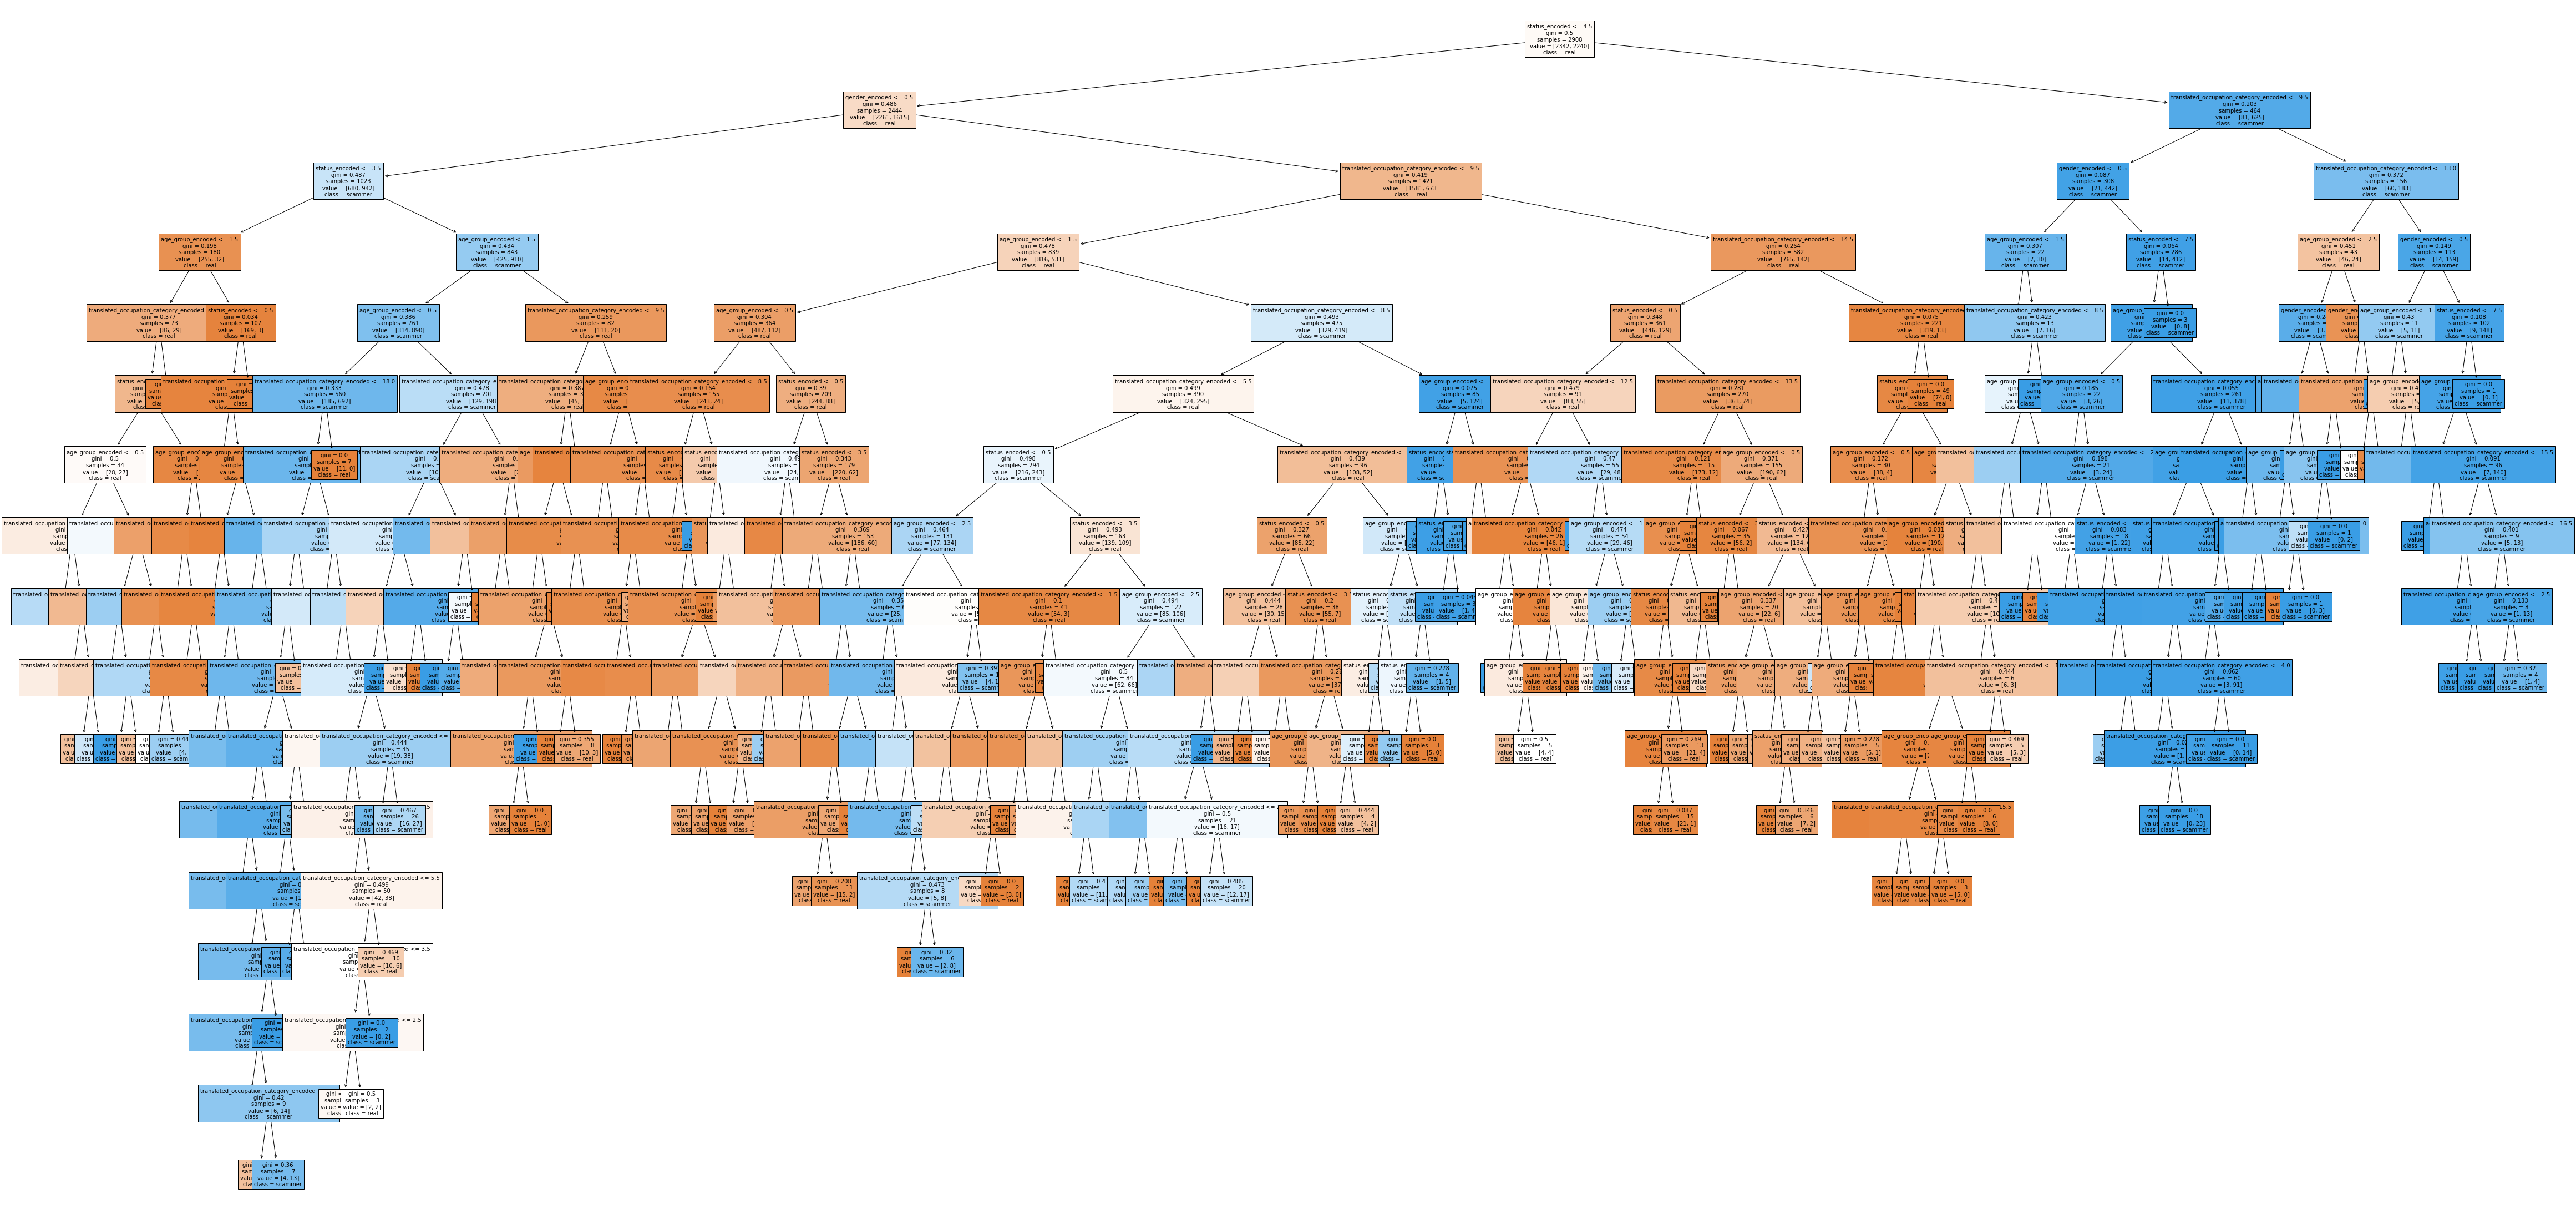

In [24]:
df2 = pd.read_csv('../final_data_cleaned.csv')
df2.isna().sum()
df2.dropna(inplace=True)
df2['translated_occupation_category'].value_counts()
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df2[['status_encoded','gender_encoded']]=df2[['status','gender']].apply(labelencoder.fit_transform)
df2[['translated_occupation_category_encoded']]=df2[['translated_occupation_category']].apply(labelencoder.fit_transform)



df2['age_grp'] = pd.qcut(df2['age'], 4)
df2['age_group_encoded'] = labelencoder.fit_transform(df2['age_grp'])

df2.head()

# features
X2 = df2.loc[:,['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
X2.sample(10)

# target
y2 = df2["y"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=99)



# random under sampling
rus = RandomUnderSampler(random_state=424)
X_train_rus, y_train_rus= rus.fit_resample(X2_train, y2_train)

# initialise Decision Tree

rf2= RandomForestClassifier()

rf2.fit(X_train_rus, y_train_rus)



plt.figure(figsize=(80,40))
plot_tree(rf2.estimators_[4], feature_names = X_train_rus.columns,class_names=['real', "scammer"],filled=True,fontsize=10);

In [25]:
# get predictions and compare results
predictions2 = rf2.predict(X2_test)
results_df = pd.DataFrame({'Actual': y2_test, 'Predicted': predictions2})
results_df.sample(10)
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y2_test, predictions2)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy2 = (tp + tn)/(tp + tn + fn + fp)
precision2 = tp / (tp + fp)
recall2 = tp / (tp + fn)
f1_score2 = 2*(precision2*recall2)/(precision2 + recall2)

print("random undersampling")
print("Accuracy:",accuracy2)
print("Precision:",precision2)
print("recall:",recall2)
print("f1_score:",f1_score2)

random undersampling
Accuracy: 0.8142011834319527
Precision: 0.6518324607329843
recall: 0.9120879120879121
f1_score: 0.7603053435114504


<h3> Random Over Sampling<h3>
    

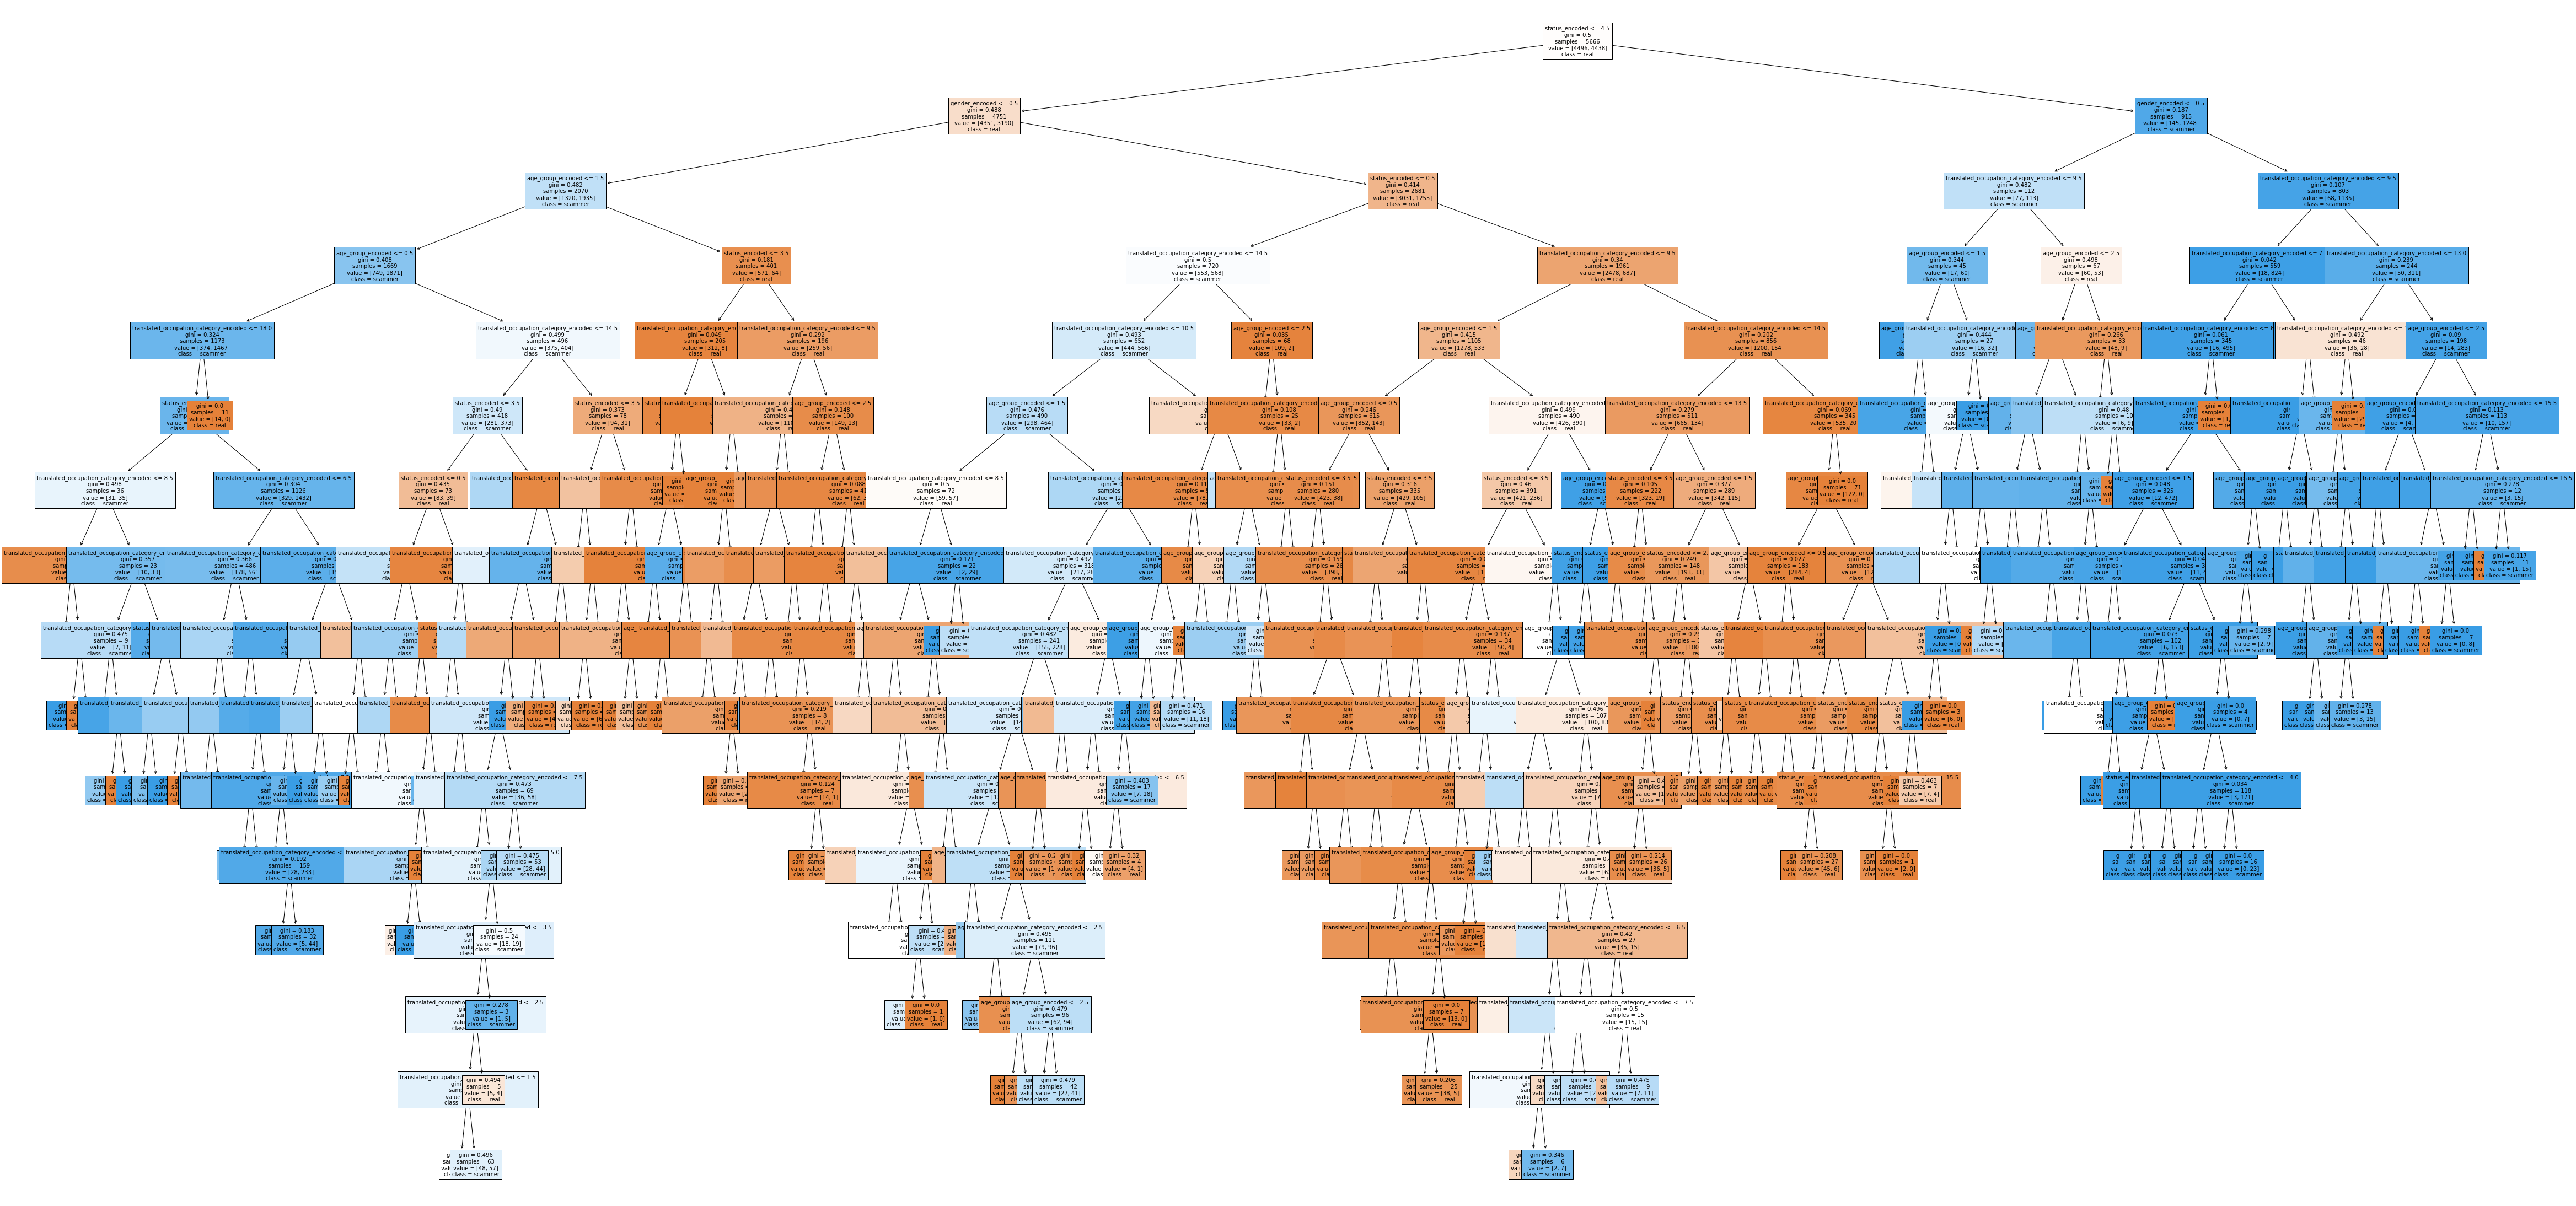

In [30]:
df3 = pd.read_csv('../final_data_cleaned.csv')
df3.isna().sum()
df3.dropna(inplace=True)
df3['translated_occupation_category'].value_counts()
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df3[['status_encoded','gender_encoded']]=df3[['status','gender']].apply(labelencoder.fit_transform)
df3[['translated_occupation_category_encoded']]=df3[['translated_occupation_category']].apply(labelencoder.fit_transform)



df3['age_grp'] = pd.qcut(df3['age'], 4)
df3['age_group_encoded'] = labelencoder.fit_transform(df3['age_grp'])

df3.head()

# features
X3 = df3.loc[:,['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
X3.sample(10)

# target
y3 = df3["y"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=99)



# random under sampling
ros = RandomOverSampler(random_state=42)
X3_train_ros, y3_train_ros= ros.fit_resample(X3_train, y3_train)

# initialise Decision Tree

rf3= RandomForestClassifier()

rf3.fit(X3_train_ros, y3_train_ros)

plt.figure(figsize=(80,40))
plot_tree(rf3.estimators_[4], feature_names = X3_train_ros.columns,class_names=['real', "scammer"],filled=True,fontsize=10);

In [31]:
# get predictions and compare results
predictions3 = rf3.predict(X3_test)
results_df = pd.DataFrame({'Actual': y3_test, 'Predicted': predictions3})
results_df.sample(10)

# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y3_test, predictions3)
tn = conf_matrix2[0][0]
fn = conf_matrix2[1][0]
tp = conf_matrix2[1][1]
fp = conf_matrix2[0][1]

accuracy3 = (tp + tn)/(tp + tn + fn + fp)
precision3 = tp / (tp + fp)
recall3 = tp / (tp + fn)
f1_score3 = 2*(precision3*recall3)/(precision3 + recall3)

print("random oversampling")
print("Accuracy:",accuracy3)
print("Precision:",precision3)
print("recall:",recall3)
print("f1_score:",f1_score3)

random oversampling
Accuracy: 0.8142011834319527
Precision: 0.6530343007915568
recall: 0.9065934065934066
f1_score: 0.7592024539877301


Decision Tree

In [43]:
print(df[df['y'] == 1])
data = [[58,'married','male','engineer']]
testdf = pd.DataFrame(data, columns=['age', 'status','gender', 'translated_occupation_category'])
testdf['age_group_encoded'] = 3
testdf['status_encoded'] = 2
testdf['gender_encoded'] = 0
testdf['translated_occupation_category_encoded']=4
test = testdf[['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
pred = rf.predict(test)
results = pd.DataFrame({'Pred': pred})
results

              username   age           occupation   status  gender  \
5611           000love  33.0              student   single  female   
5612       05johnsmith  57.0           contractor  widowed    male   
5613              1234  57.0             business  widowed    male   
5614            231411  53.0  Building Contractor   single    male   
5615   3234714190Txtme  33.0        self employed   single  female   
...                ...   ...                  ...      ...     ...   
8449       zak123hicks  36.0              soldier  widowed    male   
8450           zarifa2  24.0              student   single  female   
8451           zerenab  31.0      self employment   single  female   
8452          zikki100  36.0                nurse   single  female   
8453           zoey094  23.0              teacher   single  female   

                                      filtered sentence Language  y  \
5611  cool simple easy going easy please treated res...       nl  1   
5612  kind honest

,Pred
0,0
